<a href="https://colab.research.google.com/github/isiaqraheem/Convolution_neural_network/blob/main/convolution_Neural_Network_image_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive 
import cv2
import glob
import pathlib
import pandas as pd
import seaborn as sns
from time import time
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
data_dr = "gdrive/My Drive/vehicles/vehicles_images" ## This is the path to my data

In [ ]:
batch_size = 32  ## we will take 30 images at a time
img_height = 180  ## image height
img_width = 180  ## image width

Coverting the image to Matrices 

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dr,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 4311 files belonging to 4 classes.
Using 3449 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dr,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 4311 files belonging to 4 classes.
Using 862 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("class names:", class_names)

class names: ['bus', 'motorcycle', 'plane', 'train']


In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Visualising some training data

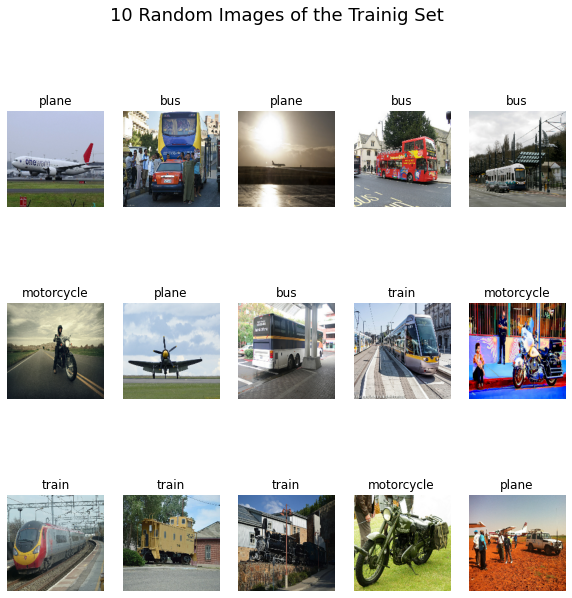

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.suptitle('10 Random Images of the Trainig Set', fontsize = 18)
        plt.axis('off')

The following bit of code prefetch the data and make it available for training

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
num_classes = 4

0.0 1.0


In [ ]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics = ["accuracy"])

In [ ]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
  

Epoch 1/10
108/108 [==============================] - 179s 2s/step - loss: 1.2159 - accuracy: 0.4688 - val_loss: 1.0627 - val_accuracy: 0.5534
Epoch 2/10
108/108 [==============================] - 108s 997ms/step - loss: 0.9950 - accuracy: 0.6031 - val_loss: 0.9972 - val_accuracy: 0.5905
Epoch 3/10
108/108 [==============================] - 108s 1s/step - loss: 0.8608 - accuracy: 0.6614 - val_loss: 0.9938 - val_accuracy: 0.5963
Epoch 4/10
108/108 [==============================] - 108s 997ms/step - loss: 0.6935 - accuracy: 0.7385 - val_loss: 1.0040 - val_accuracy: 0.5986
Epoch 5/10
108/108 [==============================] - 108s 997ms/step - loss: 0.5448 - accuracy: 0.7959 - val_loss: 1.1097 - val_accuracy: 0.5893
Epoch 6/10
108/108 [==============================] - 108s 998ms/step - loss: 0.3752 - accuracy: 0.8730 - val_loss: 1.4567 - val_accuracy: 0.5673
Epoch 7/10
108/108 [==============================] - 108s 997ms/step - loss: 0.2666 - accuracy: 0.9130 - val_loss: 1.3861 - val_a

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.215879,0.468832,1.062706,0.553364
1,0.995000,0.603073,0.997184,0.590487
2,0.860752,0.661351,0.993762,0.596288
3,0.693456,0.738475,1.003998,0.598608
4,0.544828,0.795883,1.109676,0.589327
5,0.375175,0.873007,1.456657,0.567285
6,0.266636,0.913018,1.386073,0.582367
7,0.206296,0.943462,1.582174,0.558005
8,0.167319,0.956219,1.645863,0.570766
9,0.149312,0.962018,1.647560,0.567285


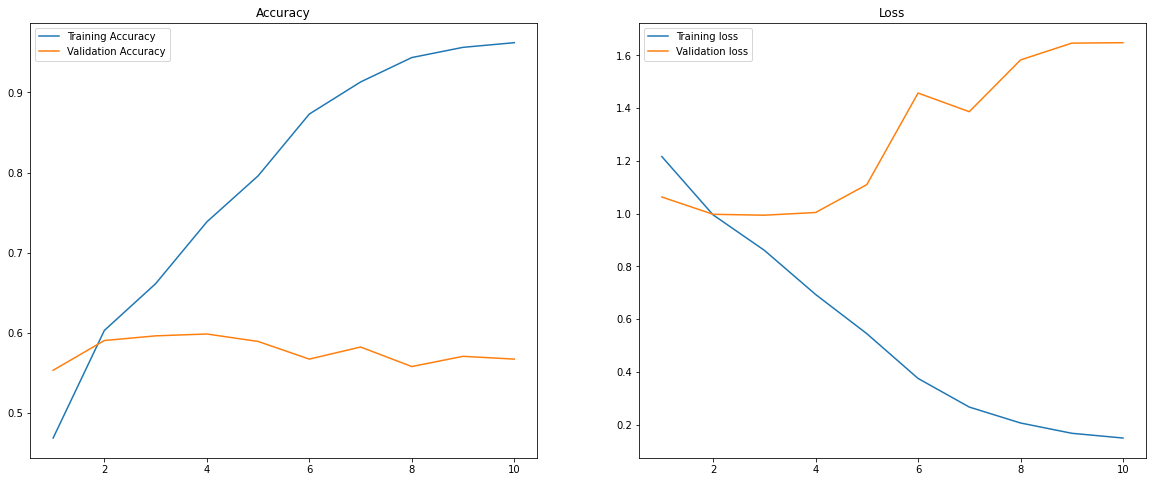

In [ ]:
epoch = range(1,  len(history_df)+1)
plt.figure(figsize = (20,8))

plt.subplot(121)
plt.title('Accuracy')
plt.plot(epoch, history_df['accuracy'], label = 'Training Accuracy')
plt.plot(epoch, history_df['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

plt.subplot(122)
plt.title('Loss')
plt.plot(epoch, history_df['loss'], label = 'Training loss')
plt.plot(epoch, history_df['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

Using Average Pulling

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 90, 90, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 45, 45, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics = ["accuracy"])

In [ ]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
  

Epoch 1/10
108/108 [==============================] - 119s 1s/step - loss: 1.1965 - accuracy: 0.4585 - val_loss: 1.0919 - val_accuracy: 0.5597
Epoch 2/10
108/108 [==============================] - 122s 1s/step - loss: 1.0306 - accuracy: 0.5673 - val_loss: 1.0348 - val_accuracy: 0.5597
Epoch 3/10
108/108 [==============================] - 117s 1s/step - loss: 0.9371 - accuracy: 0.6151 - val_loss: 0.9785 - val_accuracy: 0.5979
Epoch 4/10
108/108 [==============================] - 118s 1s/step - loss: 0.8242 - accuracy: 0.6744 - val_loss: 1.0395 - val_accuracy: 0.6107
Epoch 5/10
108/108 [==============================] - 116s 1s/step - loss: 0.6682 - accuracy: 0.7372 - val_loss: 1.0637 - val_accuracy: 0.5979
Epoch 6/10
108/108 [==============================] - 117s 1s/step - loss: 0.5417 - accuracy: 0.7916 - val_loss: 1.3378 - val_accuracy: 0.5574
Epoch 7/10
108/108 [==============================] - 117s 1s/step - loss: 0.3830 - accuracy: 0.8602 - val_loss: 1.5188 - val_accuracy: 0.5759

In [ ]:
history_df2 = pd.DataFrame(history.history)
history_df2

,loss,accuracy,val_loss,val_accuracy
0,1.196527,0.458466,1.091921,0.559676
1,1.030555,0.567294,1.034779,0.559676
2,0.937074,0.615051,0.978483,0.597914
3,0.824216,0.674385,1.039542,0.610660
4,0.668156,0.737192,1.063717,0.597914
5,0.541716,0.791606,1.337785,0.557358
6,0.382981,0.860203,1.518826,0.575898
7,0.278526,0.903907,1.623200,0.535342
8,0.214195,0.928220,1.803450,0.550406
9,0.169682,0.951085,1.807877,0.564311


Data Augmentation

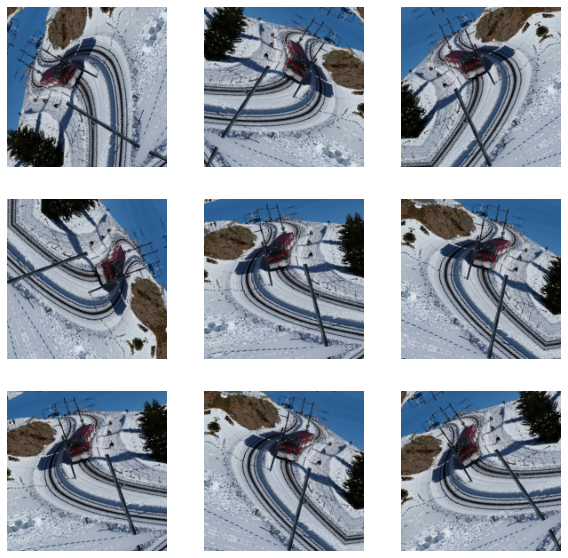

In [ ]:
# added random and realistic variation to our sample by flipping or rotating them 
data_augmentation=tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),\
                                       tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])
for image,_ in train_ds.take(1):
  plt.figure(figsize=(10,10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3,3,1+i)
    augmented_image=data_augmentation(tf.expand_dims(first_image,0))
    plt.imshow(augmented_image[0]/255)
    plt.axis('off')

      

#Applying the model to 20 downloaded image 

In [ ]:
data_dr_downloaded  = "gdrive/My Drive/Test_images"

In [ ]:
val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    data_dr_downloaded,
    image_size = (img_height, img_width))

Found 20 files belonging to 4 classes.


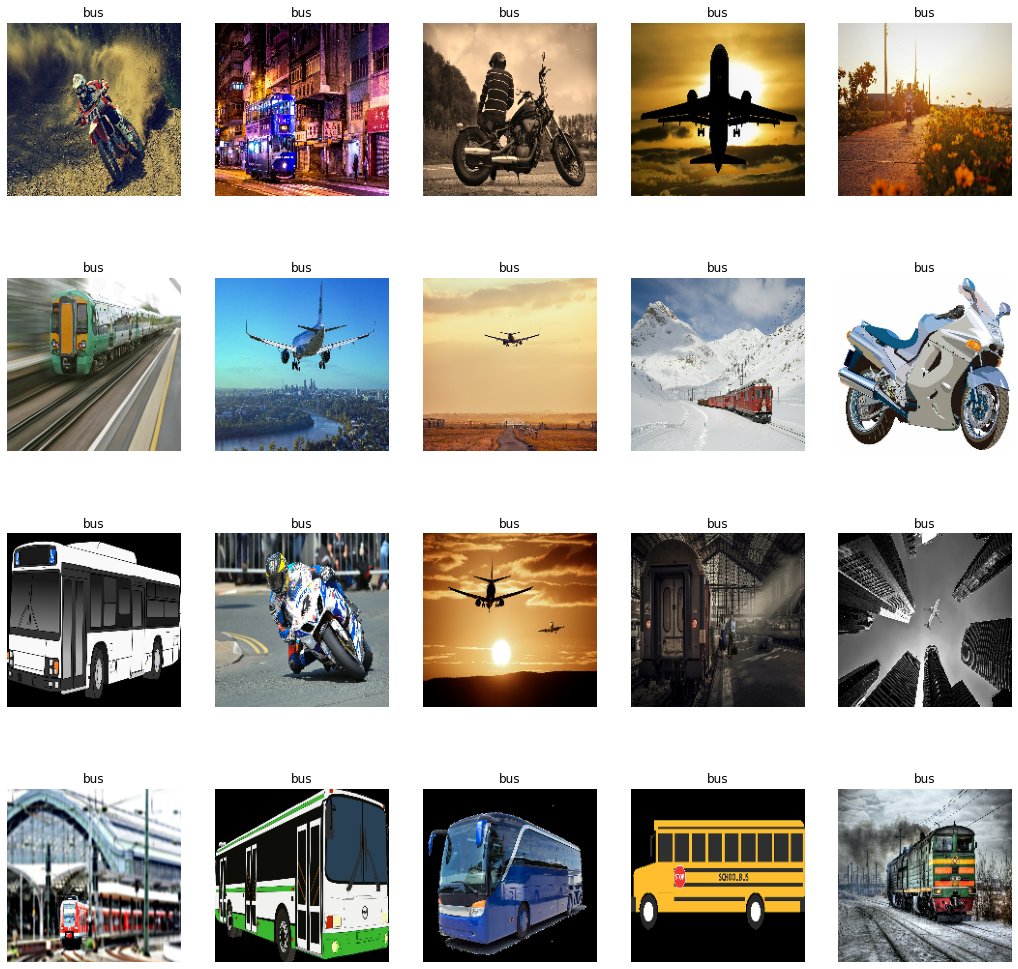

In [ ]:
plt.figure(figsize=(18, 18))

for images, labels in train_ds2.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds2 = val_ds2.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
num_classes = 4

0.016727943 1.0


In [ ]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics = ["accuracy"])

In [ ]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds2,epochs=epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 84s 771ms/step - loss: 1.2525 - accuracy: 0.4274 - val_loss: 1.5512 - val_accuracy: 0.3000
Epoch 2/10
108/108 [==============================] - 80s 736ms/step - loss: 1.0309 - accuracy: 0.5784 - val_loss: 1.4973 - val_accuracy: 0.4500
Epoch 3/10
108/108 [==============================] - 80s 740ms/step - loss: 0.9071 - accuracy: 0.6373 - val_loss: 1.3789 - val_accuracy: 0.4500
Epoch 4/10
108/108 [==============================] - 80s 740ms/step - loss: 0.7863 - accuracy: 0.6898 - val_loss: 1.2790 - val_accuracy: 0.4000
Epoch 5/10
108/108 [==============================] - 80s 738ms/step - loss: 0.6313 - accuracy: 0.7594 - val_loss: 1.5606 - val_accuracy: 0.5000
Epoch 6/10
108/108 [==============================] - 82s 763ms/step - loss: 0.4987 - accuracy: 0.8168 - val_loss: 1.3688 - val_accuracy: 0.4500
Epoch 7/10
108/108 [==============================] - 79s 734ms/step - loss: 0.3499 - accuracy: 0.8745 - val_loss: 1.7036 - val_ac

#Trasnfer learning using pretrained weight from imagenet

In [ ]:
img_height = 160  ## image height
img_width = 160  ## image width
IMG_SIZE = (img_height,img_width)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dr,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 4311 files belonging to 4 classes.
Using 3449 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dr,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 4311 files belonging to 4 classes.
Using 862 files for validation.


In [ ]:
IMG_SHAPE =IMG_SIZE +(3,)
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,include_top=False,weights='imagenet')
image_batch,label_batch=next(iter(train_ds))
feature_batch=base_model(image_batch)
print(feature_batch.shape)


9420800/9406464 [==============================] - 0s 0us/step
(32, 5, 5, 1280)


In [ ]:
base_model.trainable=False
#base_model.summary()
global_average_layer =tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)
# The globalAverage layer will generate predictions by averaging over our 5*5 locations
prediction_layers = tf.keras.layers.Dense(4)
prediction_batch =prediction_layers(feature_batch_average) 
print(prediction_batch.shape)

(32, 1280)
(32, 4)


In [ ]:
!pip install keras_applications
!pip install keras_preprocessing





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.applications import mobilenet_v2
preprecess_input=mobilenet_v2.preprocess_input

In [ ]:
from keras.applications.imagenet_utils import preprocess_input
input=tf.keras.Input(shape=(160,160,3))
x= data_augmentation(input)
x=preprocess_input(x)
x=base_model(x,training=False)
x=global_average_layer(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=prediction_layers(x)
model=tf.keras.Model(input,outputs)

base_learning_rate=0.0001
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),\
              metrics = ["accuracy"])
model.summary()
initial_epochs = 10
#loss0, accuracy0 = model.evaluate(val_ds)

#print('initial loss {.:2f}'.format(loss0))

#print('initial accuracy {.:2f}'.format(accuracy0))

history = model.fit(train_ds,validation_data=val_ds,epochs =initial_epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(initial_epochs)
  


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 tf.__operators__.getitem (S  (None, 160, 160, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 160, 160, 3)      0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0     

In [ ]:
history_3 = pd.DataFrame(history.history)
history_3

,loss,accuracy,val_loss,val_accuracy
0,1.751430,0.286170,1.357135,0.373550
1,1.467418,0.374601,1.208420,0.436195
2,1.365430,0.400696,1.131369,0.475638
3,1.295379,0.448826,1.076675,0.515081
4,1.243481,0.474340,1.043856,0.529002
5,1.191998,0.486518,1.019949,0.546404
6,1.180017,0.505654,1.007744,0.556845
7,1.152446,0.513772,0.999328,0.567285
8,1.140091,0.507973,0.986652,0.570766
9,1.126624,0.522760,0.982360,0.580046


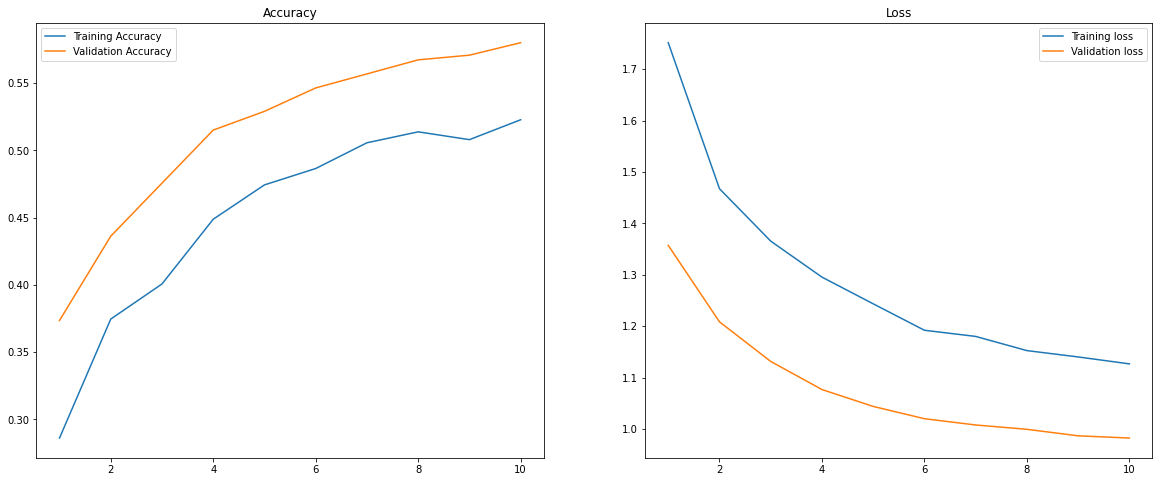

In [ ]:
epoch = range(1,  len(history_3)+1)
plt.figure(figsize = (20,8))

plt.subplot(121)
plt.title('Accuracy')
plt.plot(epoch, history_3['accuracy'], label = 'Training Accuracy')
plt.plot(epoch, history_3['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

plt.subplot(122)
plt.title('Loss')
plt.plot(epoch, history_3['loss'], label = 'Training loss')
plt.plot(epoch, history_3['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

#Fine Tuning 

In [ ]:
print(f'The number of layers in the base model  is', len(base_model.layers))

The number of layers in the base model  is 154


In [ ]:
fine_tune_at = 100 # fine tuning from 100 of the 154 layers because layers tend to be more speciliase the higher up the go
#Freezing all the lower layers beofre the fine_tune_at layers
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable=False



In [ ]:
base_learning_rate=0.0001
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),\
              metrics = ["accuracy"])

In [ ]:
initial_epochs = 10
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs
history_fine = model.fit(train_ds, epochs = total_epochs,initial_epoch= history.epoch[-1],validation_data= val_ds)


Epoch 10/20
108/108 [==============================] - 114s 1s/step - loss: 1.1125 - accuracy: 0.5268 - val_loss: 0.9828 - val_accuracy: 0.5696
Epoch 11/20
108/108 [==============================] - 103s 944ms/step - loss: 1.1035 - accuracy: 0.5352 - val_loss: 0.9808 - val_accuracy: 0.5731
Epoch 12/20
108/108 [==============================] - 104s 958ms/step - loss: 1.1195 - accuracy: 0.5170 - val_loss: 0.9803 - val_accuracy: 0.5731
Epoch 13/20
108/108 [==============================] - 104s 959ms/step - loss: 1.0940 - accuracy: 0.5309 - val_loss: 0.9797 - val_accuracy: 0.5754
Epoch 14/20
108/108 [==============================] - 111s 1s/step - loss: 1.1231 - accuracy: 0.5207 - val_loss: 0.9785 - val_accuracy: 0.5731
Epoch 15/20
108/108 [==============================] - 120s 1s/step - loss: 1.0930 - accuracy: 0.5297 - val_loss: 0.9787 - val_accuracy: 0.5777
Epoch 16/20
108/108 [==============================] - 113s 1s/step - loss: 1.0914 - accuracy: 0.5315 - val_loss: 0.9795 - val_